In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

nlp = spacy.load('en_core_web_sm')

In [117]:
path = '../data/occupations_pre.csv'
path2 = '../data/occupations_post.csv'

In [118]:
pre1834 = pd.read_csv(path)
post1834 = pd.read_csv(path2)

print(pre1834.shape,
     post1834.shape)

df = pd.concat([pre1834, post1834])
print(df.shape)

df = df.reset_index()

(19630, 4) (10960, 4)
(30590, 4)


In [119]:
def clean_df(df):
    for i, row in df.iterrows():
        if 'oldbailey' in row.occupation:
            df.at[i, 'occupation'] = row.occupation.split('oldbailey/')[-1]
        df.at[i, 'offcat'] = row.offcat.split('/')[-1]
        df.at[i, 'offsubcat'] = row.offsubcat.split('/')[-1]     
        
        https, name = row.p.split('http://cltl.nl/oldbailey/')
        if name.startswith('t') or name.startswith('s'):
            df.at[i, 'year'] = name[1:5]
        elif name.startswith('def'):
            df.at[i, 'year'] = name.split('-')[-1][:4]          
    return df

In [120]:
df = clean_df(df)
df

,index,p,occupation,offcat,offsubcat,year
0,0,http://cltl.nl/oldbailey/t16740909-1-defend2,Butler,theft,theftFromPlace,1674
1,1,http://cltl.nl/oldbailey/t16740909-1-defend2,Butler,kill,murder,1674
2,2,http://cltl.nl/oldbailey/t16741014-5-defend7,Gentlewoman,theft,other,1674
3,3,http://cltl.nl/oldbailey/t16741014-3-defend4,Boy,theft,other,1674
4,4,http://cltl.nl/oldbailey/t16741014-1-defend2,Boy,theft,animalTheft,1674
...,...,...,...,...,...,...
30585,10955,http://cltl.nl/oldbailey/def1-42-19130401,,miscellaneous,illegalAbortion,1913
30586,10956,http://cltl.nl/oldbailey/def1-42-19130401,,kill,murder,1913
30587,10957,http://cltl.nl/oldbailey/def1-42-19130401,,kill,manslaughter,1913
30588,10958,http://cltl.nl/oldbailey/def1-14-19130401,waiter,deception,forgery,1913


In [121]:
df.drop(['index', 'p'], axis=1, inplace=True)

In [122]:
import string

In [123]:
# Normalise tokens and clean stopwords
for i, row in df.iterrows():
    occ = [token.lemma_ for token in nlp(row.occupation)]
    occ = [token for token in occ if token not in stopwords]
    occ = ' '.join([token for token in occ if token not in string.punctuation])
    df.at[i, 'occupation'] = occ.lower()

In [134]:
translation = {'post':'post_office_worker',
              'serv':'servant',
              'tailor':'tailor',
              'maid':'servant',
              'nurse':'nurse',
              'chair':'chair',
              'char':'chair',
              'labor':'labourer',
              'labour':'labourer',
               'married':'wife',
              'souldier':'soldier'}

for i, row in df.iterrows():
    for old, new in translation.items():
        if old in row.occupation:
            df.at[i, 'occupation'] = row.occupation.replace(row.occupation, new)
    if row.occupation == '':
        df.at[i, 'occupation'] = row.occupation.replace(row.occupation, 'unknown')

In [135]:
occs = df.occupation.value_counts()
for occ, no in occs.items():
    print(occ,no)

servant 4668
labourer 1999
wife 1849
spinster 1834
porter 1015
post_office_worker 775
clerk 700
soldier 682
boy 578
widow 570
apprentice 481
carman 419
chair 331
dealer 300
journeyman 296
tailor 273
carpenter 261
painter 249
traveller 244
unknown 234
agent 234
errand boy 227
cook 210
engineer 193
shoemaker 151
gent 151
no_occupation 147
butcher 138
footman 134
waiter 128
coachman 125
shopman 124
seaman 123
bricklayer 121
sailor 116
merchant 114
baker 113
nurse 106
taylor 83
stoker 81
printer 79
foreman 79
coster 77
salesman 74
fitter 72
accountant 71
pot boy 69
carter 69
girl 67
hawker 67
gardener 65
warehouseman 62
watchman 60
manager 60
barman 60
waterman 58
laundress 58
groom 57
weaver 52
esq 52
barber 51
journalist 47
fireman 46
chimney sweeper 45
ostler 45
sawyer 44
solicitor 42
cooper 42
steward 40
jeweller 40
plaisterer 39
broker 37
pauper 37
housekeeper 37
blacksmith 37
greengrocer 36
artist 35
mariner 35
tinsmith 33
smith 33
marine 33
hairdresser 33
shoe maker 33
commission_ag

wine cooper 2
deal nankeens 2
carpenter joiner 2
draw boy weaver 2
high way man 2
journeymen baker 2
employ salt petre room 2
van_guard 2
sell handkerchiefs stock comb lace 2
kitchen_porter 2
wire worker 2
clerk,_traveller,_and_collector 2
bag_maker 2
lamplighter 2
com 2
belong poppet shews bartholomew fair 2
broker pawnbroker 2
-pron- tell -pron- call'd bawdy house sell gin 2
telegraphist 2
porter market 2
army 2
foregner 2
workt tile making 2
perriwigmaker barber surgeon 2
sell fruit street 2
bishopsgate street parish saint botolph 2
drive -pron- team horse 2
brasier 2
brazier 2
workmen 2
18 2
rubber_dealer 2
fifer 2
building_society_clerk 2
clerk warehouseman 2
brush_maker 2
tapster 2
shopman_for_clothe salesman 2
shoe blacker 2
receive order seas contrary statute case provide -pron- presume come england incur penalties high treason 2
portuguese 2
lock maker 2
surgeon apothecary 2
solicitor's_common_law_and_general_clerk 2
railway_porter 2
belong regiment 2
widower 2
wireman 2
clerk

mend tea chest 1
railway_company_cashier 1
digging wheeling carting 1
learn trade farmer grazier 1
sell glove 1
journeyman cutter 1
schoolmaster superintend making book eye 1
june 1
cloth_merchant 1
job buyer 1
advertising_specialist 1
boiler_scraper 1
ironmonger dealer marine store 1
pawn broker shop 1
employ stable yard 1
iron founder 1
employed_by_jeweller 1
collector_of_taxe 1
pot boy calthorpe arms public house 1
stock finisher 1
bread receive money 1
silk hatter 1
car_man 1
van_traveller 1
pretended agent 1
sell plant 1
attend shop 1
house fruit shop clothe shop 1
tide surveyour belong custom house 1
peg heel shoemaker 1
broad weaver 1
tinman_and_brazier 1
journey man weaver 1
chemist,_surgeon 1
teller 1
law_writer 1
employ clean boot 1
gun maker 1
cab_proprietor 1
fist cinder buy old rag 1
vagabond 1
-pron- carry fish street meat hawking butcher 1
take_out_bread 1
brandy man 1
work brick field 1
cat's_meat_man 1
perriwigmaker 1
management butcher's shop 1
butcher drover 1
high w

irish 1
supernumerary letter carrier 1
barrister_and_author 1
carry meat 1
deliver soap 1
costermonger -pron- sell greens 1
muffin shop 1
carrier c. 1
wife niece 1
harness maker budget man 1
newsagent 1
leave side mortal wound breadth inch depth inch wound -pron- instantly die 1
glove cutter 1
buyer seller old cloath 1
breech 1
cloth worker 1
countryman 1
barber perriwig maker 1
apprentice boot shoemaker 1
formerly_a_solicitor 1
brass turner 1
employed receive -pron- possession sum 3 s. 9 1/2 d. account -pron- master -pron- feloniously secrete steal 1
bear america 1
private_in_royal_marine 1
sentinal train bands 1
assist -pron- family 1
shoe black 1
bring -pron- garden stuff covent garden 1
straw bonnet maker 1
washer linnen 1
apprentice_shoe maker 1
warms horn 1
journeymen shoemaker 1
-pron- living thieve 1
wife harrold 1
hair dresser shop 1
catameat_vendor 1
foreman_of_carpenter 1
town traveller shopman 1
stick maker 1
employed_by_shirt_maker 1
-pron- master fraudulently embezzle sec

journeyman hatter 1
chaplain portugal embassadour 1
lawyer clerk 1
kind schoolmaster 1
gypsy 1
lumper ship 1
firework maker 1
mind butcher cart smithfield market 1
cooks girl 1
lodging house seaman 1
erand boy 1
motor_washer 1
work cow farmer 1
instructor 1
employ assist carry 158 prickle bottle barge warehouse 1
silver spoons shifts lace table cloths pair silver buckle wear appare1 thing value 12 pound 1
sell river 1
baggage_clerk_for_railway_company 1
ship keeper 1
seafare lad 1
lace maker 1
employ india warehouse 1
saffron cake maker 1
fife 1
like 1
apprentice_carver_and_gilder 1
foreman_at_silk manfacturer 1
belong 4th regiment 1
turn mangle 1
velvet cap maker 1
rule maker 1
dust boy 1
parish clerk 1
victual house 1
shoe dresser 1
officer sheriff middlesex 1
-pron- work mr. nailor silver spinner 1
landsman 1
owner_newspaper_shop 1
clean boot shoe clothe 1
employ account mix medicine 1
foot soldier 1
gunner,_driver_in_the_royal_artillery 1
porter open shut people shop 1
occasional p

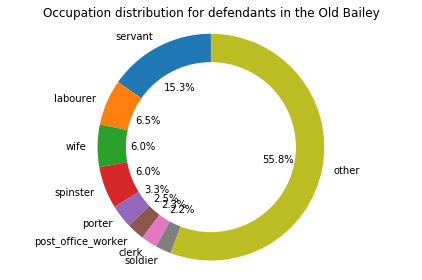

In [158]:
counts = df.occupation.value_counts()

other = 0

for i, no in counts.items():
    if no < len(df)/50:
        other += no
        counts.drop(i, inplace=True)

counts["other"] = other

labels = counts.index.to_list()
numbers = counts.to_list()

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
       startangle=90)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Occupation distribution for defendants in the Old Bailey')
plt.tight_layout()
plt.show()

In [163]:
def get_pie_plot(counts, path, n, colors):
    other = 0

    for i, no in counts.items():
        if no < len(df)/n:
            other += no
            counts.drop(i, inplace=True)

    counts["other"] = other

    labels = counts.index.to_list()
    numbers = counts.to_list()

    fig1, ax1 = plt.subplots()

    ax1.pie(numbers,
            labels=labels, 
            autopct = '%1.1f%%',
           colors=colors)

    centre_circle = plt.Circle((0,0),0.75,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  

    plt.tight_layout()
    plt.savefig(path)
    plt.show()

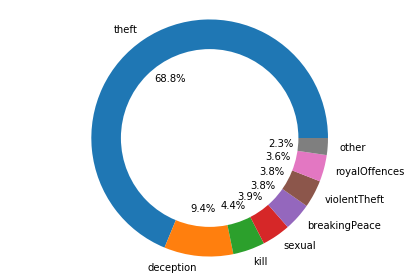

In [162]:
counts = df.offcat.value_counts()
get_pie_plot(counts, '../images/test.jpg', 50)

4668


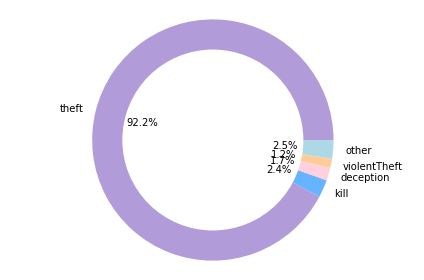

In [174]:
servants = df[df.occupation == 'servant']
print(len(servants))
counts = servants.offcat.value_counts()
colors = ['#b19cd9', '#66b3ff', '#ffd1dc','#ffcc99', '#ADD8E6']
get_pie_plot(counts, '../images/offcat_servants.jpg', 600, colors)

18.007869763135563


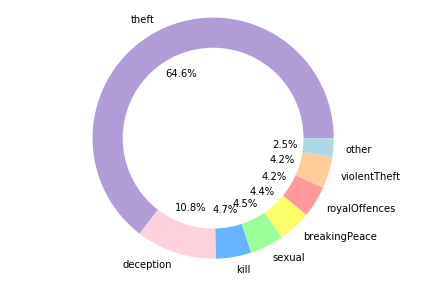

In [177]:
nonservants = df[df.occupation != 'servant']
print(len(servants)/len(nonservants)*100)
counts = nonservants.offcat.value_counts()
colors = ['#b19cd9', '#ffd1dc', '#66b3ff','#99ff99', '#fdfd69', '#ff9999','#ffcc99', '#ADD8E6']
get_pie_plot(counts, '../images/offcat_nonservant.jpg', 60, colors)

In [178]:
4517/30590

0.14766263484798953